In [2]:
import pandas as pd
pd.set_option('display.max_colwidth', 200)
import numpy as np

In [3]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df_1 = pd.read_csv('monthly_orders_usercohort.csv')

In [5]:
df_1.columns=['user_id','days_since_user_tier', 'days_ordered_in_month','payments_in_month']

In [6]:
# payments column didn't work right in Looker, drop
df_1.drop('payments_in_month', inplace=True, axis=1)

In [7]:
df_1.head()

user_id days_since_user_tier  days_ordered_in_month
0   8888854           330 to 365                      1
1   2463923           330 to 365                      2
2  40488914           330 to 365                      1
3  40488816           330 to 365                      2
4  37019221           330 to 365                      1

In [8]:
df_1.rename({'days_since_user_tier': 'month'}, axis=1, inplace=True)

In [9]:
df_1["month"] = df_1["month"].astype('category')

In [10]:
df_1.month.cat.categories

Index(['120 to 149', '150 to 179', '180 to 209', '210 to 239', '240 to 269',
       '270 to 299', '30 to 59', '300 to 329', '330 to 365', '60 to 89',
       '90 to 119', 'Below 30'],
      dtype='object')

In [11]:
df_1.month = df_1.month.cat.rename_categories({'Below 30':  '1',
                                               '30 to 59':  '2',
                                               '60 to 89':  '3',
                                               '90 to 119': '4',
                                               '120 to 149':'5',
                                               '150 to 179':'6',
                                               '180 to 209':'7',
                                               '210 to 239':'8',
                                               '240 to 269':'9',
                                               '270 to 299':'10',
                                               '300 to 329':'11',
                                               '330 to 365':'12'})

In [12]:
df_1.head()

user_id month  days_ordered_in_month
0   8888854    12                      1
1   2463923    12                      2
2  40488914    12                      1
3  40488816    12                      2
4  37019221    12                      1

In [13]:
df_1_pivot = df_1.pivot_table(index='user_id', columns='month', values=['days_ordered_in_month'], fill_value=0)

In [14]:
df_1_pivot.columns = ['_'.join(col) for col in df_1_pivot.columns.values]

In [15]:
df_1_pivot.columns

Index(['days_ordered_in_month_5', 'days_ordered_in_month_6',
       'days_ordered_in_month_7', 'days_ordered_in_month_8',
       'days_ordered_in_month_9', 'days_ordered_in_month_10',
       'days_ordered_in_month_2', 'days_ordered_in_month_11',
       'days_ordered_in_month_12', 'days_ordered_in_month_3',
       'days_ordered_in_month_4', 'days_ordered_in_month_1'],
      dtype='object')

In [16]:
df_1_pivot.reset_index(level=0, inplace=True)

In [17]:
df_2 = pd.read_csv('retention_frequency_analysis.csv')

In [18]:
df_2.columns = ['user_id', 'first_use_case', 
                'first_order_month', 'days_since_last_order', 
                'orders_week_1', 'orders_month_1', 'orders_year_1', 
               'days_ordered_first_year', 'payments_by_week_1', 'payments_by_month_1', 'payments_by_month_12']

In [19]:
df_2['retained'] = df_2['days_since_last_order'].apply(lambda x: 1 if x <365 else 0)

In [20]:
df_2.drop('days_since_last_order', axis=1, inplace=True)

In [21]:
df_2.retained.value_counts()

1    81663
0    43397
Name: retained, dtype: int64

In [22]:
df_2 = df_2.loc[pd.notnull(df_2['days_ordered_first_year'])]

In [23]:
df_2['days_ordered_first_year'] = df_2['days_ordered_first_year'].astype(int)

In [24]:
df_2.head()

user_id first_use_case first_order_month  orders_week_1  orders_month_1  \
0  39729428            NaN           2016-10              3              13   
1  39731720            NaN           2016-10              4               9   
2  39733996            NaN           2016-10              2              12   
3  39736265            NaN           2016-10              1               1   
4  38576501            NaN           2016-10              1               5   

   orders_year_1  days_ordered_first_year  payments_by_week_1  \
0             17                        3               67.95   
1             49                       10               11.96   
2             19                        3               67.95   
3              2                        2               34.95   
4             11                        7               17.95   

   payments_by_month_1  payments_by_month_12  retained  
0                67.95                 67.95         1  
1                26.91                157.05         1  
2                67.95                 67.95         1  
3                34.95                 34.95         1  
4                17.95                 35.90         1

In [25]:
df_2['first_order_month'] = df_2['first_order_month'].apply(lambda x: x[5:])

In [26]:
df_2['first_order_month_name'] = df_2['first_order_month'].apply(lambda x: 'January' if x =='01'
                                                        else 'February' if x=='02'
                                                        else 'March' if x=='03'
                                                        else 'April' if x=='04'
                                                        else 'May' if x=='05'
                                                        else 'June' if x=='06'
                                                        else 'July' if x=='07'
                                                        else 'August' if x=='08'
                                                        else 'September' if x=='09'
                                                        else 'October' if x=='10'
                                                        else 'November' if x=='11'
                                                        else 'December')

In [27]:
df_2.drop('first_order_month', axis=1, inplace=True)

In [28]:
df_2.head()

user_id first_use_case  orders_week_1  orders_month_1  orders_year_1  \
0  39729428            NaN              3              13             17   
1  39731720            NaN              4               9             49   
2  39733996            NaN              2              12             19   
3  39736265            NaN              1               1              2   
4  38576501            NaN              1               5             11   

   days_ordered_first_year  payments_by_week_1  payments_by_month_1  \
0                        3               67.95                67.95   
1                       10               11.96                26.91   
2                        3               67.95                67.95   
3                        2               34.95                34.95   
4                        7               17.95                17.95   

   payments_by_month_12  retained first_order_month_name  
0                 67.95         1                October  
1                157.05         1                October  
2                 67.95         1                October  
3                 34.95         1                October  
4                 35.90         1                October

In [191]:
# merge
df_all = pd.merge(df_1_pivot, df_2, on='user_id')

In [192]:
df_all.columns

Index(['user_id', 'days_ordered_in_month_5', 'days_ordered_in_month_6',
       'days_ordered_in_month_7', 'days_ordered_in_month_8',
       'days_ordered_in_month_9', 'days_ordered_in_month_10',
       'days_ordered_in_month_2', 'days_ordered_in_month_11',
       'days_ordered_in_month_12', 'days_ordered_in_month_3',
       'days_ordered_in_month_4', 'days_ordered_in_month_1', 'first_use_case',
       'orders_week_1', 'orders_month_1', 'orders_year_1',
       'days_ordered_first_year', 'payments_by_week_1', 'payments_by_month_1',
       'payments_by_month_12', 'retained', 'first_order_month_name'],
      dtype='object')

In [193]:
df_all.head()

user_id  days_ordered_in_month_5  days_ordered_in_month_6  \
0   2463923                        1                        0   
1   7140492                        1                        0   
2   8888854                        0                        0   
3   9742166                        0                        0   
4  12160876                        0                        0   

   days_ordered_in_month_7  days_ordered_in_month_8  days_ordered_in_month_9  \
0                        0                        0                        0   
1                        1                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   days_ordered_in_month_10  days_ordered_in_month_2  \
0                         0                        0   
1                         0                        1   
2                         0                        0   
3                         0                        0   
4                         0                        0   

   days_ordered_in_month_11  days_ordered_in_month_12           ...            \
0                         0                         2           ...             
1                         0                         0           ...             
2                         0                         1           ...             
3                         0                         0           ...             
4                         0                         0           ...             

   first_use_case  orders_week_1  orders_month_1 orders_year_1  \
0             NaN              2               2             5   
1             NaN              3               4             9   
2      travelling              4               5             7   
3             NaN              4               5             5   
4      travelling              5               5             5   

   days_ordered_first_year  payments_by_week_1  payments_by_month_1  \
0                        3                5.98                 5.98   
1                        6               17.95                17.95   
2                        2               17.95                17.95   
3                        2               16.46                26.41   
4                        1               17.95                17.95   

   payments_by_month_12  retained  first_order_month_name  
0                 17.97         1                November  
1                 17.95         0                 October  
2                 17.95         1                  August  
3                 26.41         1                 January  
4                 17.95         0                    July  

[5 rows x 23 columns]

In [194]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123238 entries, 0 to 123237
Data columns (total 23 columns):
user_id                     123238 non-null int64
days_ordered_in_month_5     123238 non-null int64
days_ordered_in_month_6     123238 non-null int64
days_ordered_in_month_7     123238 non-null int64
days_ordered_in_month_8     123238 non-null int64
days_ordered_in_month_9     123238 non-null int64
days_ordered_in_month_10    123238 non-null int64
days_ordered_in_month_2     123238 non-null int64
days_ordered_in_month_11    123238 non-null int64
days_ordered_in_month_12    123238 non-null int64
days_ordered_in_month_3     123238 non-null int64
days_ordered_in_month_4     123238 non-null int64
days_ordered_in_month_1     123238 non-null int64
first_use_case              89928 non-null object
orders_week_1               123238 non-null int64
orders_month_1              123238 non-null int64
orders_year_1               123238 non-null int64
days_ordered_first_year     123238 non-

In [195]:
df_all['days_ordered_first_6_months'] = df_all['days_ordered_in_month_1']+df_all['days_ordered_in_month_2']+df_all['days_ordered_in_month_3']+df_all['days_ordered_in_month_4']+df_all['days_ordered_in_month_5']+df_all['days_ordered_in_month_6']

In [196]:
df_all['days_ordered_last_6_months'] = df_all['days_ordered_in_month_7']+df_all['days_ordered_in_month_8']+df_all['days_ordered_in_month_9']+df_all['days_ordered_in_month_10']+df_all['days_ordered_in_month_11']+df_all['days_ordered_in_month_12']

In [197]:
def nonzero(x):
    return int(x>0)

def zero(x):
    return int(x<1)

In [198]:
# define a function to calculate the average months between orders

df_all['months_no_order'] = df_all.apply(lambda x: 
                                                 zero(x['days_ordered_in_month_1']) + 
                                                 zero(x['days_ordered_in_month_2']) +
                                                 zero(x['days_ordered_in_month_3']) + 
                                                 zero(x['days_ordered_in_month_4']) + 
                                                 zero(x['days_ordered_in_month_5']) +
                                                 zero(x['days_ordered_in_month_6']) + 
                                                 zero(x['days_ordered_in_month_7']) + 
                                                 zero(x['days_ordered_in_month_8']) +
                                                 zero(x['days_ordered_in_month_9']) + 
                                                 zero(x['days_ordered_in_month_10']) + 
                                                 zero(x['days_ordered_in_month_11']) +
                                                 zero(x['days_ordered_in_month_12']) 
                                                , axis=1)

In [199]:
df_all['months_ordered_first_year'] = df_all.apply(lambda x: 
                                                               nonzero(x['days_ordered_in_month_1']) + 
                                                               nonzero(x['days_ordered_in_month_2']) +
                                                               nonzero(x['days_ordered_in_month_3']) + 
                                                               nonzero(x['days_ordered_in_month_4']) + 
                                                               nonzero(x['days_ordered_in_month_5']) +
                                                               nonzero(x['days_ordered_in_month_6']) + 
                                                               nonzero(x['days_ordered_in_month_7']) + 
                                                               nonzero(x['days_ordered_in_month_8']) +
                                                               nonzero(x['days_ordered_in_month_9']) + 
                                                               nonzero(x['days_ordered_in_month_10']) + 
                                                               nonzero(x['days_ordered_in_month_11']) +
                                                               nonzero(x['days_ordered_in_month_12']) 
                                                    , axis=1)

In [200]:
# days ordered in each quarter
df_all['days_ordered_Q1'] = df_all.apply(lambda x: x['days_ordered_in_month_1']+x['days_ordered_in_month_2']+x['days_ordered_in_month_3'], axis=1)
df_all['days_ordered_Q2'] = df_all.apply(lambda x: x['days_ordered_in_month_4']+x['days_ordered_in_month_5']+x['days_ordered_in_month_6'], axis=1)
df_all['days_ordered_Q3'] = df_all.apply(lambda x: x['days_ordered_in_month_7']+x['days_ordered_in_month_8']+x['days_ordered_in_month_9'], axis=1)
df_all['days_ordered_Q4'] = df_all.apply(lambda x: x['days_ordered_in_month_10']+x['days_ordered_in_month_11']+x['days_ordered_in_month_12'], axis=1)

In [201]:
# months ordered in each quarter
df_all['mos_ordered_Q1'] = df_all.apply(lambda x: nonzero(x['days_ordered_in_month_3']) + nonzero(x['days_ordered_in_month_1']) + nonzero(x['days_ordered_in_month_2']), axis=1)
df_all['mos_ordered_Q2'] = df_all.apply(lambda x: nonzero(x['days_ordered_in_month_4']) + nonzero(x['days_ordered_in_month_5']) + nonzero(x['days_ordered_in_month_6']), axis=1)
df_all['mos_ordered_Q3'] = df_all.apply(lambda x: nonzero(x['days_ordered_in_month_7']) + nonzero(x['days_ordered_in_month_8']) + nonzero(x['days_ordered_in_month_9']), axis=1)
df_all['mos_ordered_Q4'] = df_all.apply(lambda x: nonzero(x['days_ordered_in_month_10']) + nonzero(x['days_ordered_in_month_11']) + nonzero(x['days_ordered_in_month_12']), axis=1)

In [202]:
df_all['quarters_ordered_first_year'] = df_all.apply(lambda x: nonzero(x['mos_ordered_Q1']) + nonzero(x['mos_ordered_Q2']) + nonzero(x['mos_ordered_Q3']) + nonzero(x['mos_ordered_Q4']), axis=1)

In [203]:
df_all['avg_months_between_orders'] = df_all['months_no_order']/df_all['months_ordered_first_year']

In [204]:
df_all['months_ordered_first_6'] = df_all.apply(lambda x: nonzero(x['days_ordered_in_month_6']) + 
                                                               nonzero(x['days_ordered_in_month_1']) + 
                                                               nonzero(x['days_ordered_in_month_2']) +
                                                               nonzero(x['days_ordered_in_month_3']) + 
                                                               nonzero(x['days_ordered_in_month_4']) + 
                                                               nonzero(x['days_ordered_in_month_5'])
                                                   , axis=1)

In [205]:
df_all['months_ordered_last_6'] = df_all.apply(lambda x: nonzero(x['days_ordered_in_month_7']) + 
                                                               nonzero(x['days_ordered_in_month_8']) + 
                                                               nonzero(x['days_ordered_in_month_9']) +
                                                               nonzero(x['days_ordered_in_month_10']) + 
                                                               nonzero(x['days_ordered_in_month_11']) + 
                                                               nonzero(x['days_ordered_in_month_12'])
                                                   , axis=1)

In [206]:
df_all.head()

user_id  days_ordered_in_month_5  days_ordered_in_month_6  \
0   2463923                        1                        0   
1   7140492                        1                        0   
2   8888854                        0                        0   
3   9742166                        0                        0   
4  12160876                        0                        0   

   days_ordered_in_month_7  days_ordered_in_month_8  days_ordered_in_month_9  \
0                        0                        0                        0   
1                        1                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   days_ordered_in_month_10  days_ordered_in_month_2  \
0                         0                        0   
1                         0                        1   
2                         0                        0   
3                         0                        0   
4                         0                        0   

   days_ordered_in_month_11  days_ordered_in_month_12          ...            \
0                         0                         2          ...             
1                         0                         0          ...             
2                         0                         1          ...             
3                         0                         0          ...             
4                         0                         0          ...             

   days_ordered_Q3  days_ordered_Q4  mos_ordered_Q1 mos_ordered_Q2  \
0                0                2               1              1   
1                1                0               3              2   
2                0                1               1              0   
3                0                0               1              0   
4                0                0               1              0   

   mos_ordered_Q3  mos_ordered_Q4  quarters_ordered_first_year  \
0               0               1                            3   
1               1               0                            3   
2               0               1                            2   
3               0               0                            1   
4               0               0                            1   

   avg_months_between_orders  months_ordered_first_6  months_ordered_last_6  
0                        3.0                       2                      1  
1                        1.0                       5                      1  
2                        5.0                       1                      1  
3                       11.0                       1                      0  
4                       11.0                       1                      0  

[5 rows x 39 columns]

In [207]:
# check the correlation between retention and features - find where it's >.50

In [208]:
df_all.corr()['retained']

user_id                        0.005339
days_ordered_in_month_5        0.212007
days_ordered_in_month_6        0.216514
days_ordered_in_month_7        0.217442
days_ordered_in_month_8        0.222195
days_ordered_in_month_9        0.224079
days_ordered_in_month_10       0.219633
days_ordered_in_month_2        0.151212
days_ordered_in_month_11       0.221320
days_ordered_in_month_12       0.260480
days_ordered_in_month_3        0.178221
days_ordered_in_month_4        0.199084
days_ordered_in_month_1        0.088159
orders_week_1                 -0.009201
orders_month_1                 0.005863
orders_year_1                  0.127965
days_ordered_first_year        0.490778
payments_by_week_1            -0.041277
payments_by_month_1           -0.024370
payments_by_month_12           0.140813
retained                       1.000000
days_ordered_first_6_months    0.247300
days_ordered_last_6_months     0.341998
months_no_order               -0.500589
months_ordered_first_year      0.500589


In [267]:
# get columns with highest correlation
ret = df_all[['user_id', 'first_use_case', 'retained', 'quarters_ordered_first_year']]

In [268]:
ret_dummies = pd.get_dummies(ret, columns=['quarters_ordered_first_year'])

In [269]:
correlated_cols = ret_dummies.columns[1:]

In [270]:
correl = ret_dummies[correlated_cols].corr()

In [271]:
retention_corrs = pd.DataFrame(data=correl[1:]['retained']).rename(columns={'retained':'correlation with retention'})

In [272]:
retention_corrs

correlation with retention
quarters_ordered_first_year_1                   -0.679776
quarters_ordered_first_year_2                    0.216133
quarters_ordered_first_year_3                    0.309790
quarters_ordered_first_year_4                    0.277952

Highest correlations: quarters_ordered_first_year_3

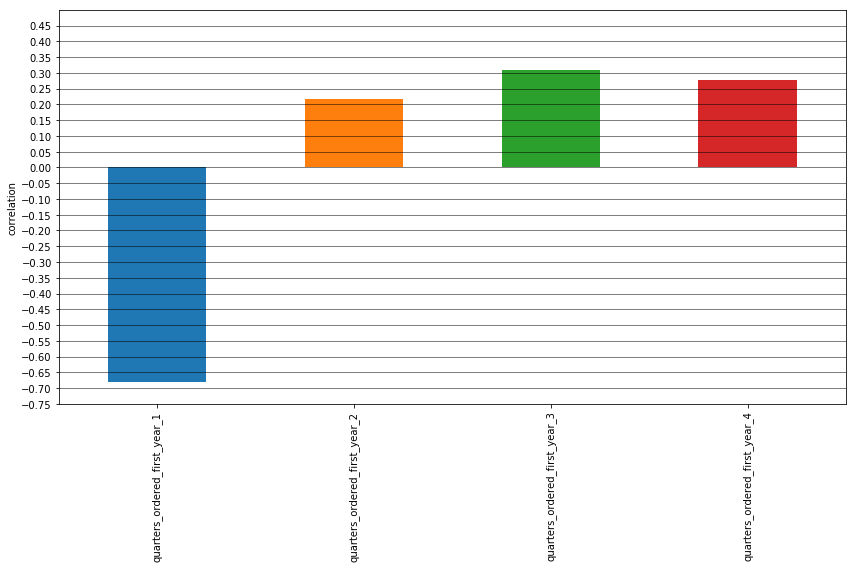

In [227]:
correl[1:].plot.bar(y='retained', legend=False, figsize=(12,8))
plt.ylim(-0.75, 0.5)
plt.yticks(np.arange(-0.75, .5, step=0.05))
plt.ylabel('correlation')
plt.grid(axis='y',linestyle='-', linewidth='0.5', color='black')
plt.tight_layout()
plt.savefig('retention_correl_V3.png', transparent=True)

Get correlations for each individual use case

In [273]:
# get dummies for first_use_case

ret_dummies.head()

user_id first_use_case  retained  quarters_ordered_first_year_1  \
0   2463923            NaN         1                              0   
1   7140492            NaN         0                              0   
2   8888854     travelling         1                              0   
3   9742166            NaN         1                              1   
4  12160876     travelling         0                              1   

   quarters_ordered_first_year_2  quarters_ordered_first_year_3  \
0                              0                              1   
1                              0                              1   
2                              1                              0   
3                              0                              0   
4                              0                              0   

   quarters_ordered_first_year_4  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0

In [274]:
correlated_cols = ret_dummies.columns[1:]

In [275]:
use_cases = ret_dummies['first_use_case'].unique()

In [276]:
correl = ret_dummies[correlated_cols].corr()

# make dataframe of correlation coefficients
retention_corrs = pd.DataFrame(data=correl[1:]['retained']).rename(columns={'retained':'all users'})

# add other use cases to dataframe
for uc in use_cases:
    retention_corrs[uc] = ret_dummies[ret_dummies['first_use_case']==uc][correlated_cols].corr()[1:]['retained']

retention_corrs

all users  NaN  travelling  just because  \
quarters_ordered_first_year_1  -0.679776  NaN   -0.695629     -0.756895   
quarters_ordered_first_year_2   0.216133  NaN    0.299668      0.252137   
quarters_ordered_first_year_3   0.309790  NaN    0.294410      0.336277   
quarters_ordered_first_year_4   0.277952  NaN    0.221390      0.288379   

                                   bulk  thank you  parenting  birthday  \
quarters_ordered_first_year_1 -0.770599  -0.743177  -0.724090 -0.723344   
quarters_ordered_first_year_2  0.310568   0.236871   0.103782  0.246331   
quarters_ordered_first_year_3  0.352091   0.341632   0.316608  0.332050   
quarters_ordered_first_year_4  0.298199   0.272865   0.343418  0.260607   

                                holiday  
quarters_ordered_first_year_1 -0.656349  
quarters_ordered_first_year_2  0.112778  
quarters_ordered_first_year_3  0.364740  
quarters_ordered_first_year_4  0.303189

In [233]:
retention_corrs.to_csv('retention_corrs_by_use_case_Oct2016-Oct2017_V3.csv')

## Find features with high correlation with the habit moment to identify the aha moment

In [ ]:
# only select features that are shorter time frame (first 6 months)

In [253]:
df_dummies = pd.get_dummies(df_all, columns=['quarters_ordered_first_year'])

In [256]:
df_dummies.corr()['quarters_ordered_first_year_3'].sort_values(ascending=False)

quarters_ordered_first_year_3    1.000000
retained                         0.309790
months_ordered_first_year        0.265358
days_ordered_first_year          0.254804
months_ordered_last_6            0.250743
mos_ordered_Q3                   0.241122
mos_ordered_Q2                   0.229899
months_ordered_first_6           0.206541
mos_ordered_Q4                   0.182379
days_ordered_Q3                  0.127710
days_ordered_last_6_months       0.121420
days_ordered_Q2                  0.120282
days_ordered_in_month_7          0.104123
mos_ordered_Q1                   0.101141
days_ordered_in_month_8          0.099583
days_ordered_in_month_4          0.093137
days_ordered_in_month_6          0.091889
days_ordered_in_month_5          0.090880
days_ordered_in_month_9          0.089136
days_ordered_Q4                  0.086621
days_ordered_first_6_months      0.082127
days_ordered_in_month_10         0.067029
days_ordered_in_month_12         0.065761
days_ordered_in_month_11         0

In [ ]:
# none of these are highly correlated with the habit moment - try looking at other actions
# segment by use case
# find action first, then check different time frames

In [ ]:
number of use cases, number of addresses, number of unique people sent to, times openend app...